In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
columns_vouluse  = ['Age', 'Attrition','Education','Gender','JobRole', 'JobSatisfaction',
                       'MonthlyIncome','OverTime','WorkLifeBalance','YearsAtCompany'
                    ]
df = df[columns_vouluse]
df.head()

,Age,Attrition,Education,Gender,JobRole,JobSatisfaction,MonthlyIncome,OverTime,WorkLifeBalance,YearsAtCompany
0,41,Yes,2,Female,Sales Executive,4,5993,Yes,1,6
1,49,No,1,Male,Research Scientist,2,5130,No,3,10
2,37,Yes,2,Male,Laboratory Technician,3,2090,Yes,3,0
3,33,No,4,Female,Research Scientist,3,2909,Yes,3,8
4,27,No,1,Male,Laboratory Technician,2,3468,No,3,2


In [7]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.nunique())

(1470, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1470 non-null   int64 
 1   Attrition        1470 non-null   object
 2   Education        1470 non-null   int64 
 3   Gender           1470 non-null   object
 4   JobRole          1470 non-null   object
 5   JobSatisfaction  1470 non-null   int64 
 6   MonthlyIncome    1470 non-null   int64 
 7   OverTime         1470 non-null   object
 8   WorkLifeBalance  1470 non-null   int64 
 9   YearsAtCompany   1470 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 115.0+ KB
None
               Age    Education  JobSatisfaction  MonthlyIncome  \
count  1470.000000  1470.000000      1470.000000    1470.000000   
mean     36.923810     2.912925         2.728571    6502.931293   
std       9.135373     1.024165         1.102846    4707.956783   
min      18.00000

In [8]:
Att_pr = (df['Attrition'].value_counts(normalize= True) * 100).round(2)
Att_pr

,proportion
Attrition,
No,83.88
Yes,16.12


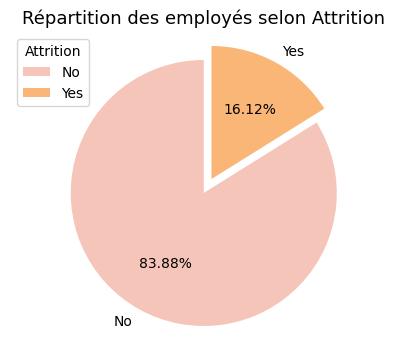

In [9]:
plt.figure(figsize=(5, 4))
plt.pie(Att_pr, startangle= 90 , labels= Att_pr.index, autopct= '%1.2f%%',
        explode= [0.06] * len(Att_pr),colors=["#F5C5BA","#F9B677"])
plt.legend(title='Attrition')
plt.title("Répartition des employés selon Attrition").set_fontsize(13)
plt.axis('equal')
plt.show()

In [10]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

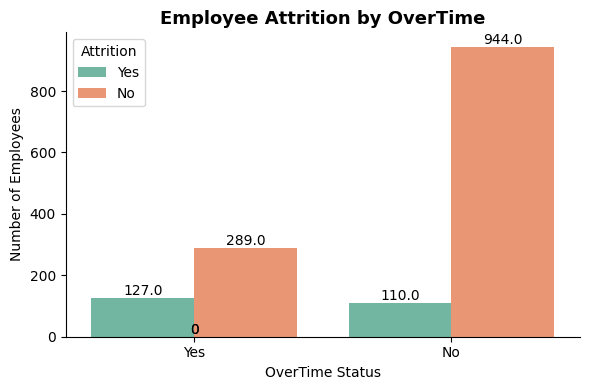

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title("Employee Attrition by OverTime", fontsize=13, fontweight='bold')
plt.xlabel("OverTime Status", fontsize=10)
plt.ylabel("Number of Employees", fontsize=10)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


In [12]:
df["JobSatisfaction"].unique()

array([4, 2, 3, 1])

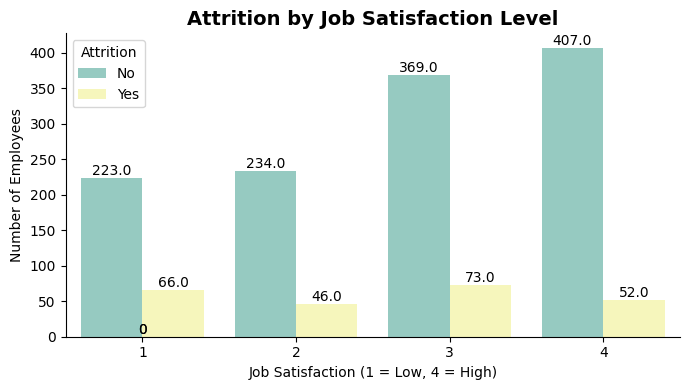

In [13]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set3')

plt.title("Attrition by Job Satisfaction Level", fontsize=14, fontweight='bold')
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)", fontsize=10)
plt.ylabel("Number of Employees", fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3326740140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='coolwarm')


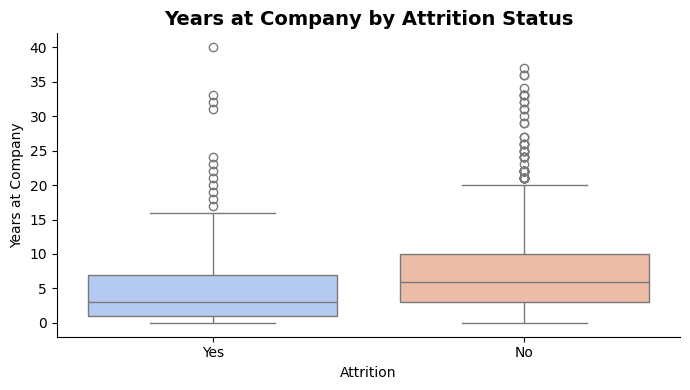

In [14]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', palette='coolwarm')

plt.title("Years at Company by Attrition Status", fontsize=14, fontweight='bold')
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Years at Company", fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


In [15]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

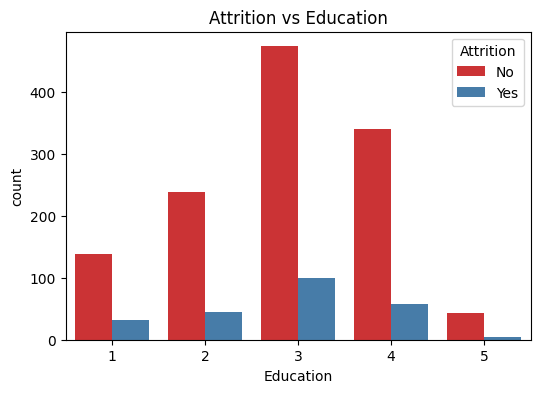

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition vs Education')
plt.show()


/tmp/ipython-input-3423689018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='BuPu')


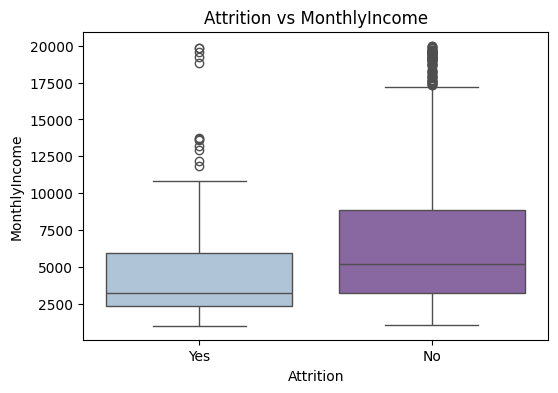

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='BuPu')
plt.title('Attrition vs MonthlyIncome')
plt.show()


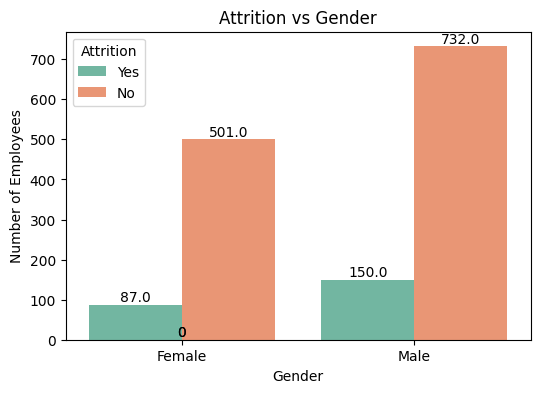

In [18]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition vs Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

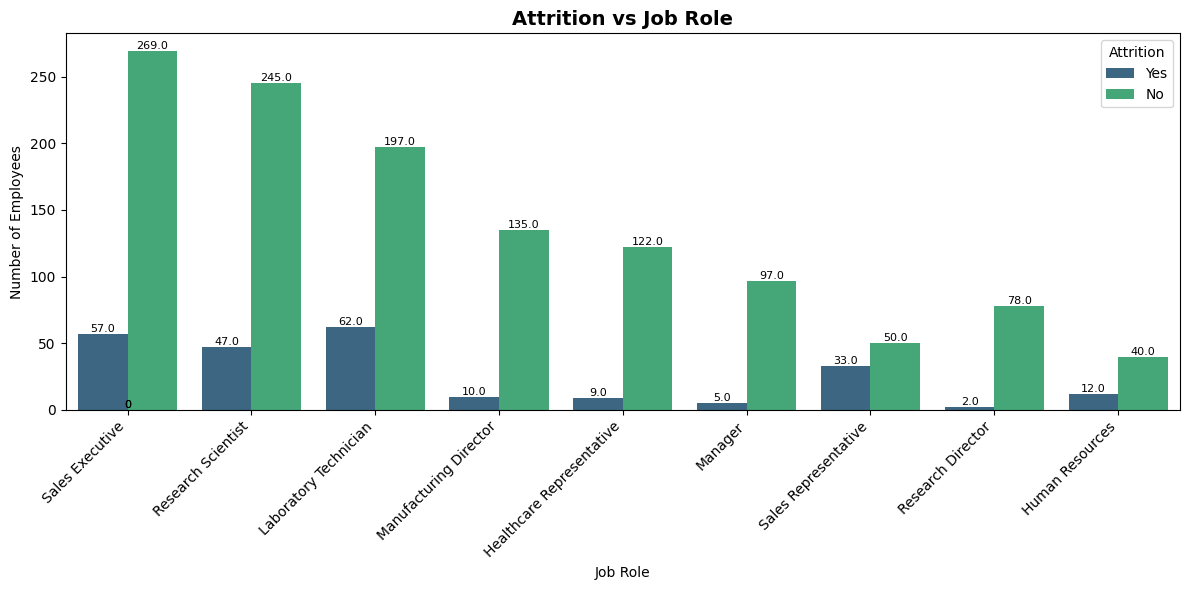

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition vs Job Role', fontsize=14, fontweight='bold')
plt.xlabel('Job Role', fontsize=10)
plt.ylabel('Number of Employees', fontsize=10)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()